In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from tqdm import tqdm

In [ ]:
# Plot settings

plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('font', family="Arial")

## Load data

In [2]:
data = pd.read_excel('./Liver volcano.xlsx')
data['abs_fc'] = np.absolute(data['FC KO/WT'])

## Volcano plot

In [4]:
# number of unique proteins 
len(np.unique(data['Protein Name']))

1712

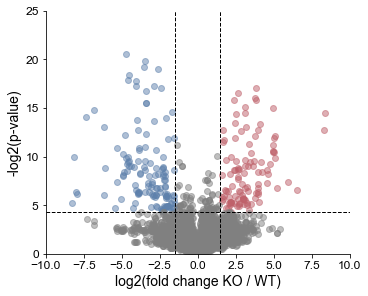

In [5]:
fig, ax = plt.subplots(figsize=(5,4), constrained_layout=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

count_pos = 0
count_neg = 0

for i in data.index:
    
    if data.loc[i, 'FC KO/WT'] >=1.5 and data.loc[i, 'p-value'] >= -np.log2(0.05):
        
        plt.scatter(x=data.loc[i, 'FC KO/WT'], y=data.loc[i, 'p-value'], alpha=.5, c='#BF616A')
        
        count_pos += 1
        
    elif data.loc[i, 'FC KO/WT'] <=-1.5 and data.loc[i, 'p-value'] >= -np.log2(0.05):
        
        plt.scatter(x=data.loc[i, 'FC KO/WT'], y=data.loc[i, 'p-value'], alpha=.5, c='#5E81AC')    
    
        count_neg += 1
        
    else: 
        plt.scatter(x=data.loc[i, 'FC KO/WT'], y=data.loc[i, 'p-value'], alpha=.5, c='gray')    
    
    
plt.axhline(y=-np.log2(0.05), color='k', linestyle='dashed', linewidth=1)
plt.axvline(x=-1.5, color='k', linestyle='dashed', linewidth=1)
plt.axvline(x=1.5, color='k', linestyle='dashed', linewidth=1)

plt.xlim(-10,10)
plt.ylim(0, 25)

plt.ylabel('-log2(p-value)', fontdict={'size': 14})
plt.xlabel('log2(fold change KO / WT)', fontdict={'size': 14})

plt.savefig('./volcano.png', dpi=300)

plt.show()

In [6]:
print('Up', count_pos)
print('Down', count_neg)
print('Total', count_pos + count_neg)

Up 108
Down 136
Total 244


## Hits export for network analysis

In [23]:
# Selecting significant hits
selected = data[data["p-value"] > -np.log2(0.05)]
selected.shape

(309, 10)

In [25]:
# To be paste in Cytoscape
upregulated = selected[selected['FC KO/WT'] > 1.5]
upregulated['Gene Name'].to_clipboard()

In [27]:
# To be past in Cytoscape
downregulated = selected[selected['FC KO/WT'] < 1.5]
downregulated['Gene Name'].to_clipboard()

## Highlights for Bnip3 and Ndrg1

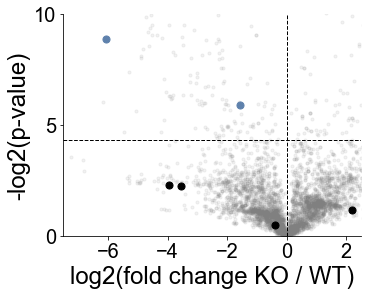

In [7]:
target = 'Bnip3'

fig, ax = plt.subplots(figsize=(5,4), constrained_layout=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.scatter(x=data['FC KO/WT'], y=data['p-value'], alpha=.1, c='gray', s=10)
    
t_prot = data[data['Gene Name'] == target]

for i in t_prot.index:
    
    if t_prot.loc[i, 'FC KO/WT'] >=0 and t_prot.loc[i, 'p-value'] >= -np.log2(0.05):
        
        plt.scatter(x=t_prot.loc[i, 'FC KO/WT'], y=t_prot.loc[i, 'p-value'], alpha=1, c='#BF616A', s=50)
        
    elif t_prot.loc[i, 'FC KO/WT'] <0 and t_prot.loc[i, 'p-value'] >= -np.log2(0.05):
        
        plt.scatter(x=t_prot.loc[i, 'FC KO/WT'], y=t_prot.loc[i, 'p-value'], alpha=1, c='#5E81AC', s=50)    
    
    else: 
        plt.scatter(x=t_prot.loc[i, 'FC KO/WT'], y=t_prot.loc[i, 'p-value'], alpha=1, c='k', s=50)    
    
    
plt.axhline(y=-np.log2(0.05), color='k', linestyle='dashed', linewidth=1)

plt.axvline(x=0, color='k', linestyle='dashed', linewidth=1)

plt.xlim(-7.5,2.5)
plt.ylim(0, 10)

plt.ylabel('-log2(p-value)', fontdict={'size': 24})
plt.xlabel('log2(fold change KO / WT)', fontdict={'size': 24})
plt.yticks([0, 5, 10], fontsize=20)
plt.xticks([-6, -4, -2, 0, 2], fontsize=20)

plt.savefig(f'./zoom-{target}.png', dpi=300)

plt.show()

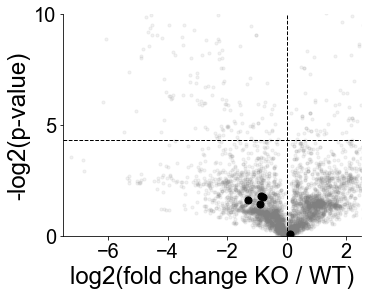

In [8]:
target = 'Ndrg1'

fig, ax = plt.subplots(figsize=(5,4), constrained_layout=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.scatter(x=data['FC KO/WT'], y=data['p-value'], alpha=.1, c='gray', s=10)
    
t_prot = data[data['Gene Name'] == target]

for i in t_prot.index:
    
    if t_prot.loc[i, 'FC KO/WT'] >=0 and t_prot.loc[i, 'p-value'] >= -np.log2(0.05):
        
        plt.scatter(x=t_prot.loc[i, 'FC KO/WT'], y=t_prot.loc[i, 'p-value'], alpha=1, c='#BF616A', s=50)
        
    elif t_prot.loc[i, 'FC KO/WT'] <0 and t_prot.loc[i, 'p-value'] >= -np.log2(0.05):
        
        plt.scatter(x=t_prot.loc[i, 'FC KO/WT'], y=t_prot.loc[i, 'p-value'], alpha=1, c='#5E81AC', s=50)    
    
    else: 
        plt.scatter(x=t_prot.loc[i, 'FC KO/WT'], y=t_prot.loc[i, 'p-value'], alpha=1, c='k', s=50)    
    
    
plt.axhline(y=-np.log2(0.05), color='k', linestyle='dashed', linewidth=1)

plt.axvline(x=0, color='k', linestyle='dashed', linewidth=1)

plt.xlim(-7.5,2.5)
plt.ylim(0, 10)

plt.ylabel('-log2(p-value)', fontdict={'size': 24})
plt.xlabel('log2(fold change KO / WT)', fontdict={'size': 24})
plt.yticks([0, 5, 10], fontsize=20)
plt.xticks([-6, -4, -2, 0, 2], fontsize=20)

plt.savefig(f'./zoom-{target}.png', dpi=300)

plt.show()
plt.show()

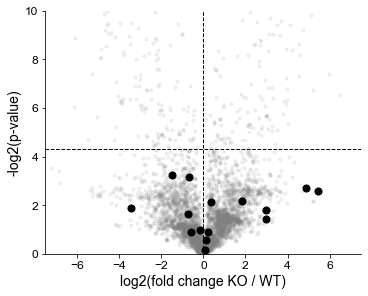

In [20]:
target = 'Nrdg2'

fig, ax = plt.subplots(figsize=(5,4), constrained_layout=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.scatter(x=data['FC KO/WT'], y=data['p-value'], alpha=.1, c='gray', s=10)
    
t_prot = data[data['Gene Name'] == target]

for i in t_prot.index:
    
    if t_prot.loc[i, 'FC KO/WT'] >=0 and t_prot.loc[i, 'p-value'] >= -np.log2(0.05):
        
        plt.scatter(x=t_prot.loc[i, 'FC KO/WT'], y=t_prot.loc[i, 'p-value'], alpha=1, c='#BF616A', s=50)
        
    elif t_prot.loc[i, 'FC KO/WT'] <0 and t_prot.loc[i, 'p-value'] >= -np.log2(0.05):
        
        plt.scatter(x=t_prot.loc[i, 'FC KO/WT'], y=t_prot.loc[i, 'p-value'], alpha=1, c='#5E81AC', s=50)    
    
    else: 
        plt.scatter(x=t_prot.loc[i, 'FC KO/WT'], y=t_prot.loc[i, 'p-value'], alpha=1, c='k', s=50)    
    
    
plt.axhline(y=-np.log2(0.05), color='k', linestyle='dashed', linewidth=1)

plt.axvline(x=0, color='k', linestyle='dashed', linewidth=1)

plt.xlim(-7.5,2.5)
plt.ylim(0, 10)

plt.ylabel('-log2(p-value)', fontdict={'size': 24})
plt.xlabel('log2(fold change KO / WT)', fontdict={'size': 24})
plt.yticks([0, 5, 10], fontsize=20)
plt.xticks([-6, -4, -2, 0, 2], fontsize=20)

plt.savefig(f'./zoom-{target}.png', dpi=300)

plt.show()

## ∆P calulcation

In [12]:
dP_calc = []

for gene in np.unique(list(data['Gene Name'])):
    
    local_selection = data[data['Gene Name'] == gene]
    
    res = dict()
    res['Gene'] = gene
    
    if np.sum(local_selection['p-value'] >= -np.log10(0.05)) > 0:
        
        res['deltaP'] = np.sum(local_selection['FC KO/WT'])
    
    elif np.sum(local_selection['p-value'] >= -np.log10(0.05)) == 0:
    
        res['deltaP'] = 0
    
    res['num_peptides'] = local_selection.shape[0]
    
    dP_calc.append(res)

In [13]:
deltaP = pd.DataFrame(dP_calc)

In [14]:
# Std for cutoffs
std = np.std(deltaP['deltaP'])

In [15]:
# Hyperphosphorylated are 2*standard deviation above 0 (as ∆P is centered on 0)
hyper = deltaP[deltaP['deltaP'] >= 2*std]
hyper.to_excel('./dP_hyperphospho.xlsx')

In [16]:
hyper.shape

(41, 3)

In [17]:
# Hypophosphorylated are 2*standard deviation below 0 (as ∆P is centered on 0)
hypo = deltaP[deltaP['deltaP'] <= -2*std ]
hypo.to_excel('./dP_hypophospho.xlsx')

In [18]:
hypo.shape

(50, 3)

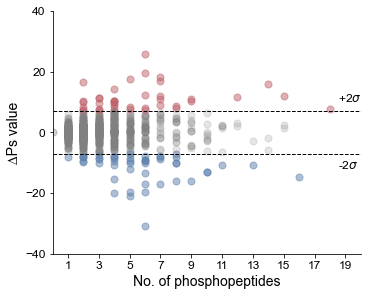

In [19]:
# Plot

fig, ax = plt.subplots(figsize=(5,4), constrained_layout=True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


for i in deltaP.index:
    
    if deltaP.loc[i, 'deltaP'] > 2*std:

        plt.scatter(deltaP.loc[i, 'num_peptides'], deltaP.loc[i, 'deltaP'], alpha=.5, s=50, c='#BF616A')
    
    elif deltaP.loc[i, 'deltaP'] < -2*std:
    
        plt.scatter(deltaP.loc[i, 'num_peptides'], deltaP.loc[i, 'deltaP'], alpha=.5, s=50, c='#5E81AC')
        
    else:
        
        plt.scatter(deltaP.loc[i, 'num_peptides'], deltaP.loc[i, 'deltaP'], alpha=.2, s=50, c='gray')
        
        
plt.axhline(y=2*std, color='k', linestyle='dashed', linewidth=1)
plt.axhline(y=-2*std, color='k', linestyle='dashed', linewidth=1)
#plt.xscale('log')
plt.xlim(0, 20)
plt.ylim(-40, 40)
plt.yticks([-40, -20, 0, 20, 40])

plt.text(x=18.5, y=10, s='+2$\sigma$', fontdict={'size': 12})
plt.text(x=18.5, y=-12, s='-2$\sigma$', fontdict={'size': 12})

plt.xticks(np.arange(1, 21, 2))

plt.ylabel('∆Ps value', fontdict={'size': 14})
plt.xlabel('No. of phosphopeptides', fontdict={'size': 14})
plt.savefig('./deltaP.png', dpi=300)
plt.show()